In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
\
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from tensorflow.keras.utils import Sequence

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K


from typeguard import typechecked
from typing import Optional

In [2]:
train_directory = '/Users/KAMAR/Videos/ML/Alzheimer_s Dataset/train/'
test_directory = '/Users/KAMAR/Videos/ML/Alzheimer_s Dataset/test'

In [3]:
train_Mild_Demented_dir = os.path.join(train_directory, 'Mild_Demented')  # directory with our training Demented pictures
train_Moderate_Demented_dir = os.path.join(train_directory, 'Moderate_Demented')# directory with our training NonDemented pictures
train_Non_Demented_dir = os.path.join(train_directory,'Non_Demented')
train_Very_Mild_Demented_dir = os.path.join(train_directory,'Very_Mild_Demented')
test_Mild_Demented_dir = os.path.join(test_directory, 'Mild_Demented')  # directory with our validation Demented pictures
test_Moderate_Demented_dir = os.path.join(test_directory, 'Moderate_Demented')  # directory with our validation NonDemented pictures
test_Non_Demented_dir = os.path.join(test_directory, 'Non_Demented')
test_Very_Mild_Demented_dir = os.path.join(test_directory, 'Very_Mild_Demented')

In [4]:
num_Mild_Demented_tr = len(os.listdir(train_Mild_Demented_dir))
num_Moderate_Demented_tr = len(os.listdir(train_Moderate_Demented_dir))
num_Non_Demented_tr = len(os.listdir(train_Non_Demented_dir))
num_Very_Mild_Demented_tr = len(os.listdir(train_Very_Mild_Demented_dir))

num_Mild_Demented_te = len(os.listdir(test_Mild_Demented_dir))
num_Moderate_Demented_te = len(os.listdir(test_Moderate_Demented_dir))
num_Non_Demented_te = len(os.listdir(test_Non_Demented_dir))
num_Very_Mild_Demented_te = len(os.listdir(test_Very_Mild_Demented_dir))

In [5]:
total_train = num_Mild_Demented_tr + num_Moderate_Demented_tr + num_Non_Demented_tr + num_Very_Mild_Demented_tr
total_test = num_Mild_Demented_te + num_Moderate_Demented_te + num_Non_Demented_te + num_Very_Mild_Demented_te

In [6]:
print('total training Mild Demented images:', num_Mild_Demented_tr)
print('total training Moderte Demented images:', num_Moderate_Demented_tr)
print('total training Non Demented images:', num_Non_Demented_tr)
print('total training Very Mild Demented images:', num_Very_Mild_Demented_tr)

print('total validation Mild Demented images:', num_Mild_Demented_te)
print('total validation Moderate Demented images:', num_Moderate_Demented_te)
print('total validation Non Demented images:', num_Non_Demented_te)
print('total validation Very Mild Demented images:', num_Very_Mild_Demented_te)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_test)

total training Mild Demented images: 717
total training Moderte Demented images: 52
total training Non Demented images: 2560
total training Very Mild Demented images: 1792
total validation Mild Demented images: 179
total validation Moderate Demented images: 12
total validation Non Demented images: 640
total validation Very Mild Demented images: 448
--
Total training images: 5121
Total validation images: 1279


In [7]:
# re-size all the images to this
image_size= [224,224]
batch_size =128
epochs =10

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen= ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [9]:
train_dataset = train_datagen.flow_from_directory(batch_size=batch_size, directory=train_directory,
                                                           shuffle=True,subset = 'training',
                                                           target_size=image_size,
                                                            class_mode = 'categorical')





Found 4098 images belonging to 4 classes.


In [10]:
valid_dataset = valid_datagen.flow_from_directory(batch_size=batch_size, directory=train_directory,
                                                           shuffle=True,subset = 'validation',
                                                           target_size=image_size,
                                                            class_mode = 'categorical')

Found 1023 images belonging to 4 classes.


In [11]:
test_dataset = test_datagen.flow_from_directory(directory = test_directory,
                                                  target_size =image_size,
                                                  class_mode = 'categorical',
                                                  batch_size =batch_size)

Found 1279 images belonging to 4 classes.


In [12]:
def build_model():
    
    '''Sequential Model creation'''
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),padding='same',input_shape = (224,224,3),activation='relu'))
    
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
    
    
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        3

In [13]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [14]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [15]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy',metrics=METRICS)

In [21]:
history = model.fit_generator(
    train_dataset, epochs=epochs, validation_data=valid_dataset, verbose=1, callbacks = lr_scheduler)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
33/33 [==============================] - 1066s 32s/step - loss: 1.1950 - accuracy: 0.7480 - precision: 0.4896 - recall: 0.1835 - auc: 0.7668 - f1_score: 0.1780 - val_loss: 1.0466 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.0000e+00
Epoch 2/10
33/33 [==============================] - 1283s 39s/step - loss: 1.0447 - accuracy: 0.7502 - precision: 0.5010 - recall: 0.2347 - auc: 0.7779 - f1_score: 0.2277 - val_loss: 1.0349 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.0000e+00
Epoch 3/10
33/33 [==============================] - 1302s 39s/step - loss: 1.0417 - accuracy: 0.7491 - precision: 0.4964 - recall: 0.2326 - auc: 0.7793 - f1_score: 0.2256 - val_loss: 1.0352 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7804 - val_f1_score: 0.

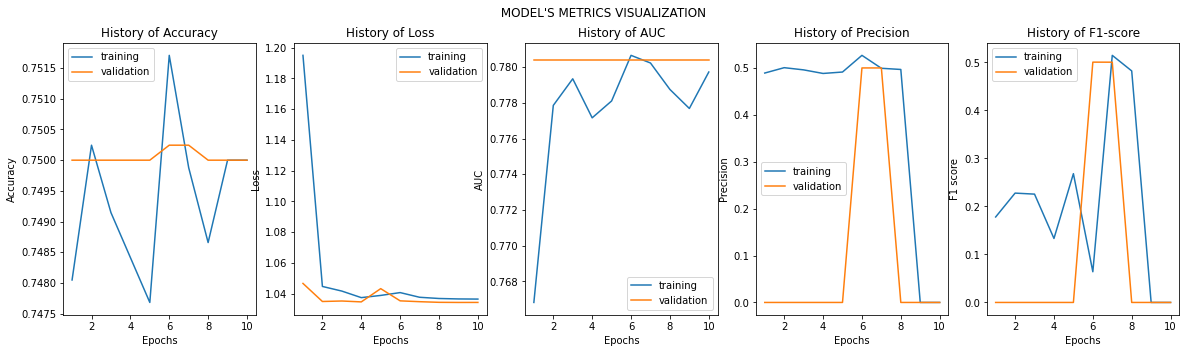

In [22]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [23]:
scores = model.evaluate_generator(test_dataset)

In [24]:
print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])

Accuracy =  0.75
Precision =  0.0
Recall =  0.0
AUC =  0.7805577516555786
F1_score =  0.0
